In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
"""
    number of trajectories in each city
    # austin --  train: 43041 test: 6325 
    # miami -- train: 55029 test:7971
    # pittsburgh -- train: 43544 test: 6361
    # dearborn -- train: 24465 test: 3671
    # washington-dc -- train: 25744 test: 3829
    # palo-alto -- train:  11993 test:1686

    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds
    
"""

'\n    number of trajectories in each city\n    # austin --  train: 43041 test: 6325 \n    # miami -- train: 55029 test:7971\n    # pittsburgh -- train: 43544 test: 6361\n    # dearborn -- train: 24465 test: 3671\n    # washington-dc -- train: 25744 test: 3829\n    # palo-alto -- train:  11993 test:1686\n\n    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds\n    \n'

In [2]:
from glob import glob
import pickle5
import numpy as np

ROOT_PATH = "argo2/"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):
    f_in = ROOT_PATH + split + "/" + city + "_inputs"
    inputs = pickle5.load(open(f_in, "rb"))
    inputs = np.asarray(inputs)
    
    outputs = None
    
    if split=="train":
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle5.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)

    return torch.from_numpy(inputs).float(), torch.from_numpy(outputs).long()

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None, ):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform

        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)
        self.inputs = self.inputs#.to(device)
        self.outputs = self.outputs#.to(device)
    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
city = 'palo-alto' 
split = 'train'
train_dataset  = ArgoverseDataset(city = city, split = split)

In [3]:
austin = ArgoverseDataset(city ='austin', split = 'train')
miami = ArgoverseDataset(city ='miami', split = 'train')
pittsburgh =ArgoverseDataset(city ='pittsburgh', split = 'train')
dearborn = ArgoverseDataset(city ='dearborn', split = 'train')
washingtondc = ArgoverseDataset(city ='washington-dc', split = 'train')
paloalto = ArgoverseDataset(city ='palo-alto', split = 'train')

### Change in Position over period

In [4]:
austin_changes_x = []
austin_changes_y = []
for i in austin:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    austin_changes_x.append(change_x)
    austin_changes_y.append(change_y)

In [5]:
miami_changes_x = []
miami_changes_y = []
for i in miami:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    miami_changes_x.append(change_x)
    miami_changes_y.append(change_y)

In [6]:
pittsburgh_changes_x = []
pittsburgh_changes_y = []
for i in pittsburgh:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    pittsburgh_changes_x.append(change_x)
    pittsburgh_changes_y.append(change_y)

In [7]:
dearborn_changes_x = []
dearborn_changes_y = []
for i in dearborn:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    dearborn_changes_x.append(change_x)
    dearborn_changes_y.append(change_y)

In [8]:
washingtondc_changes_x = []
washingtondc_changes_y = []
for i in washingtondc:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    washingtondc_changes_x.append(change_x)
    washingtondc_changes_y.append(change_y)

In [9]:
paloalto_changes_x = []
paloalto_changes_y = []
for i in paloalto:
    change = i[0][0] - i[0][-1] 
    change_x = change[0].item()
    change_y = change[1].item()
    paloalto_changes_x.append(change_x)
    paloalto_changes_y.append(change_y)

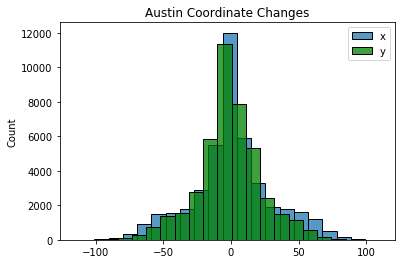

In [10]:
sns.histplot(austin_changes_x, bins=20), sns.histplot(austin_changes_y, bins=20, color='green').set(title='Austin Coordinate Changes')
plt.legend('xy')
plt.savefig('austin_changes.jpg')

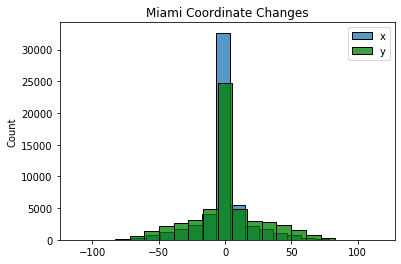

In [11]:
sns.histplot(miami_changes_x, bins=20), sns.histplot(miami_changes_y, bins=20, color='green').set(title='Miami Coordinate Changes')
plt.legend('xy')
plt.savefig('miami_changes.jpg')

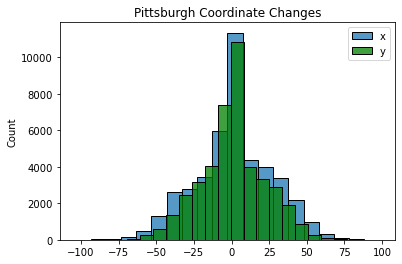

In [13]:
sns.histplot(pittsburgh_changes_x, bins=20), sns.histplot(pittsburgh_changes_y, bins=20, color='green').set(title='Pittsburgh Coordinate Changes')
plt.legend('xy')
plt.savefig('pittsburgh_changes.jpg')

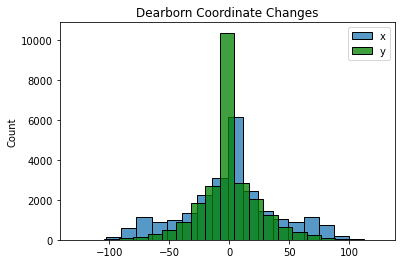

In [14]:
sns.histplot(dearborn_changes_x, bins=20), sns.histplot(dearborn_changes_y, bins=20, color='green').set(title='Dearborn Coordinate Changes')
plt.legend('xy')
plt.savefig('dearborn_changes.jpg')

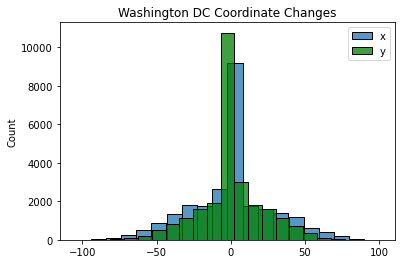

In [15]:
sns.histplot(washingtondc_changes_x, bins=20), sns.histplot(washingtondc_changes_y, bins=20, color='green').set(title='Washington DC Coordinate Changes')
plt.legend('xy')
plt.savefig('washingtondc_changes.jpg')

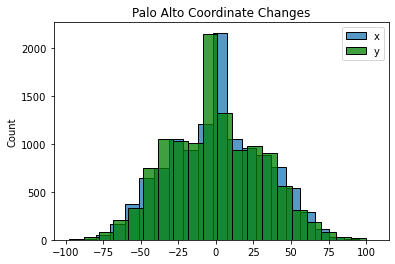

In [16]:
sns.histplot(paloalto_changes_x, bins=20), sns.histplot(paloalto_changes_y, bins=20, color='green').set(title='Palo Alto Coordinate Changes')
plt.legend('xy')
plt.savefig('paloalto_changes.jpg')

### Position Distributions

In [17]:
austin_inputs = []
for i in austin:
    austin_inputs.append(i[0])

In [18]:
austin_inputs[:10]

[tensor([[-371.9725,  869.6596],
         [-371.9723,  869.6594],
         [-371.9720,  869.6592],
         [-371.9717,  869.6591],
         [-371.9713,  869.6589],
         [-371.9709,  869.6589],
         [-371.9703,  869.6591],
         [-371.9700,  869.6584],
         [-371.9698,  869.6573],
         [-371.9693,  869.6579],
         [-371.9688,  869.6600],
         [-371.9683,  869.6632],
         [-371.9679,  869.6674],
         [-371.9677,  869.6720],
         [-371.9673,  869.6764],
         [-371.9670,  869.6804],
         [-371.9667,  869.6841],
         [-371.9664,  869.6877],
         [-371.9661,  869.6908],
         [-371.9657,  869.6929],
         [-371.9655,  869.6945],
         [-371.9651,  869.6938],
         [-371.9648,  869.6916],
         [-371.9645,  869.6901],
         [-371.9645,  869.6891],
         [-371.9648,  869.6879],
         [-371.9648,  869.6882],
         [-371.9648,  869.6902],
         [-371.9648,  869.6924],
         [-371.9651,  869.6945],
         [

In [60]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


In [98]:
axises = (np.arange(1000) / 100)

In [114]:
axises

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [106]:
axis_map_x = defaultdict(int)
axis_map_y = defaultdict(int)
for i in axises:
    axis_map_x[i] = 0
    axis_map_y[i] = 0

In [137]:
len(austin_inputs)

43041

In [139]:
coords = defaultdict(int)
for i in range(100):
    austin_ex1 = pd.DataFrame(austin_inputs[i])#.apply(lambda x: x.item())
    austin_ex1[0] = austin_ex1[0].apply(lambda x: x.item())
    austin_ex1[1] = austin_ex1[1].apply(lambda x: x.item())
    austin_ex1.columns = ['x', 'y']
    austin_ex1['exists'] = pd.Series(np.ones(len(austin_ex1)))
    austin_ex1['x'] = NormalizeData(austin_ex1['x'])
    austin_ex1['y'] = NormalizeData(austin_ex1['y'])

    austin_ex1['x'] = austin_ex1['x'].apply(lambda x: np.round(x, 2))
    austin_ex1['y'] = austin_ex1['y'].apply(lambda x: np.round(x, 2))
    for j in range(len(austin_ex1)):
        coords[(austin_ex1.iloc[j]['x'], austin_ex1.iloc[j]['y'])] += 1
    
    # if i == 0:
    #     sns.heatmap(austin_ex1.pivot('x', 'y'), square=True, vmin=0, vmax=9.99)
    # sns.heatmap(austin_ex1.pivot('x', 'y'), square=True, vmin=0, vmax=9.99, cbar=False)

In [140]:
ruse = pd.DataFrame(list(coords.keys()))
ruse['mass'] = list(coords.values())
ruse.columns = ['x', 'y', 'mass']

<AxesSubplot:xlabel='None-y', ylabel='x'>

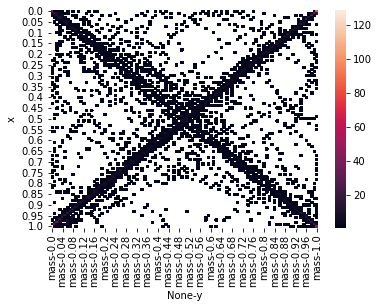

In [141]:
sns.heatmap(ruse.pivot('x', 'y'))

In [113]:
pd.DataFrame(data={'x': co, 'y': axises})

,x,y
0,0.00,0.00
1,0.01,0.01
2,0.02,0.02
3,0.03,0.03
4,0.04,0.04
...,...,...
995,9.95,9.95
996,9.96,9.96
997,9.97,9.97
998,9.98,9.98


In [82]:
austin_ex1 = pd.DataFrame(austin_inputs[0])#.apply(lambda x: x.item())

In [83]:
austin_ex1[0] = austin_ex1[0].apply(lambda x: x.item())
austin_ex1[1] = austin_ex1[1].apply(lambda x: x.item())

In [84]:
austin_ex1.columns = ['x', 'y']
austin_ex1['exists'] = pd.Series(np.ones(len(austin_ex1)))
austin_ex1['x'] = NormalizeData(austin_ex1['x'])
austin_ex1['y'] = NormalizeData(austin_ex1['y'])

austin_ex1['x'] = austin_ex1['x'].apply(lambda x: np.round(x, 2))
austin_ex1['y'] = austin_ex1['y'].apply(lambda x: np.round(x, 2))

In [85]:
np.round(0.34, 2)

0.34

In [87]:
austin_ex1

,x,y,exists
0,0.00,0.04,1.0
1,0.03,0.04,1.0
2,0.07,0.03,1.0
3,0.10,0.03,1.0
4,0.15,0.03,1.0
5,0.21,0.03,1.0
6,0.27,0.03,1.0
7,0.31,0.02,1.0
8,0.34,0.00,1.0
9,0.40,0.01,1.0


<AxesSubplot:xlabel='None-y', ylabel='x'>

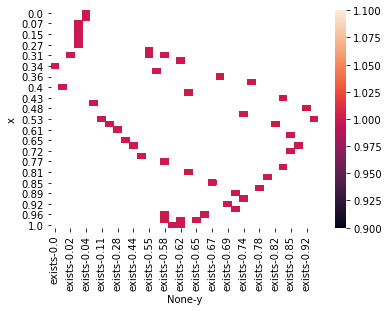

In [88]:
sns.heatmap()

<AxesSubplot:>

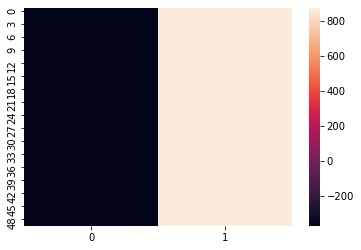

In [38]:
sns.heatmap(austin_ex1)